<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter9/Fuzzy_time_series_forecasting.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install -U git+https://github.com/PYFTS/pyFTS

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
  Cloning https://github.com/PYFTS/pyFTS to /tmp/pip-req-build-9bj0m7_f
  Running command git clone --filter=blob:none --quiet https://github.com/PYFTS/pyFTS /tmp/pip-req-build-9bj0m7_f
  Resolved https://github.com/PYFTS/pyFTS to commit 4e0ee7cdd9fc9a8ac9170c0c3496536ef0378cb7
  Preparing metadata (setup.py) ... done


In [8]:
import pandas as pd
import datetime
pd.datetime = datetime.datetime  # Monkey patch for compatibility

In [2]:
pip install SimpSOM

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Note: you may need to restart the kernel to use updated packages.


### External libraries import

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"

In [9]:
from pyFTS.common import Transformations

tdiff = Transformations.Differential(1)

2025-05-08 12:58:33.100886: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-08 12:58:33.115499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746701913.126281  229552 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746701913.129979  229552 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746701913.144403  229552 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [10]:
from pyFTS.data import NASDAQ, SP500

datasets = {
    "SP500": SP500.get_data()[11500:16000],
    "NASDAQ": NASDAQ.get_data()
}

train_split = 2000

In [11]:
datasets["NASDAQ"]

array([2373.61, 2434.87, 2597.32, ..., 5215.29, 5226.75, 5210.88])

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

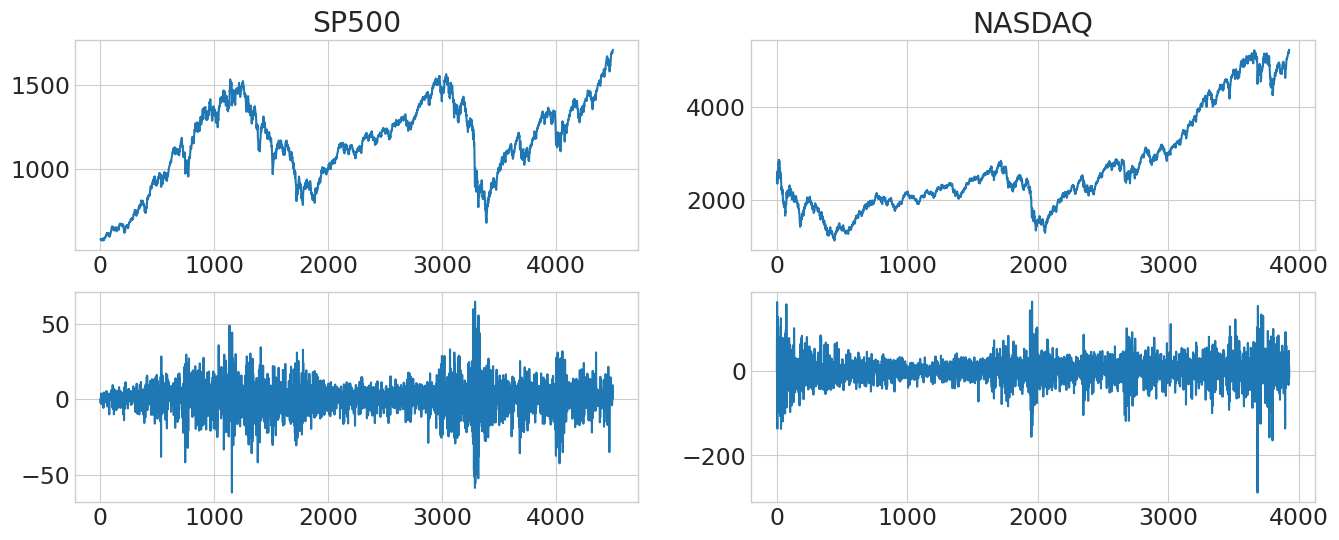

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[16, 6])

for count, (dataset_name, dataset) in enumerate(datasets.items()):
    dataset_diff = tdiff.apply(dataset)

    ax[0][count].plot(dataset)
    ax[1][count].plot(dataset_diff)
    ax[0][count].set_title(dataset_name)

### Statistics

In [13]:
from statsmodels.tsa.stattools import adfuller

rows = []

for count, (dataset_name, dataset) in enumerate(datasets.items()):
    row = [dataset_name]
    result = adfuller(dataset)
    row.extend([result[0],result[1]])
    row.extend([value for key, value in result[4].items()])
    rows.append(row)
    
pd.DataFrame(rows, columns=['Dataset','ADF Statistic','p-value','Cr. Val. 1%','Cr. Val. 5%','Cr. Val. 10%'])

,Dataset,ADF Statistic,p-value,Cr. Val. 1%,Cr. Val. 5%,Cr. Val. 10%
0,SP500,-1.747171,0.406987,-3.431811,-2.862186,-2.567114
1,NASDAQ,0.476224,0.984132,-3.432022,-2.862279,-2.567163


In [14]:
from pyFTS.models import song
from pyFTS.partitioners import Grid

models = {}

for count, (dataset_name, dataset) in enumerate(datasets.items()):
    partitioner_diff = Grid.GridPartitioner(data=dataset, npart=15, transformation=tdiff)
    model = song.ConventionalFTS(partitioner=partitioner_diff)
    model.name = dataset_name
    model.append_transformation(tdiff)
    model.fit(dataset[:train_split], order=1)
    models[dataset_name] = model

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

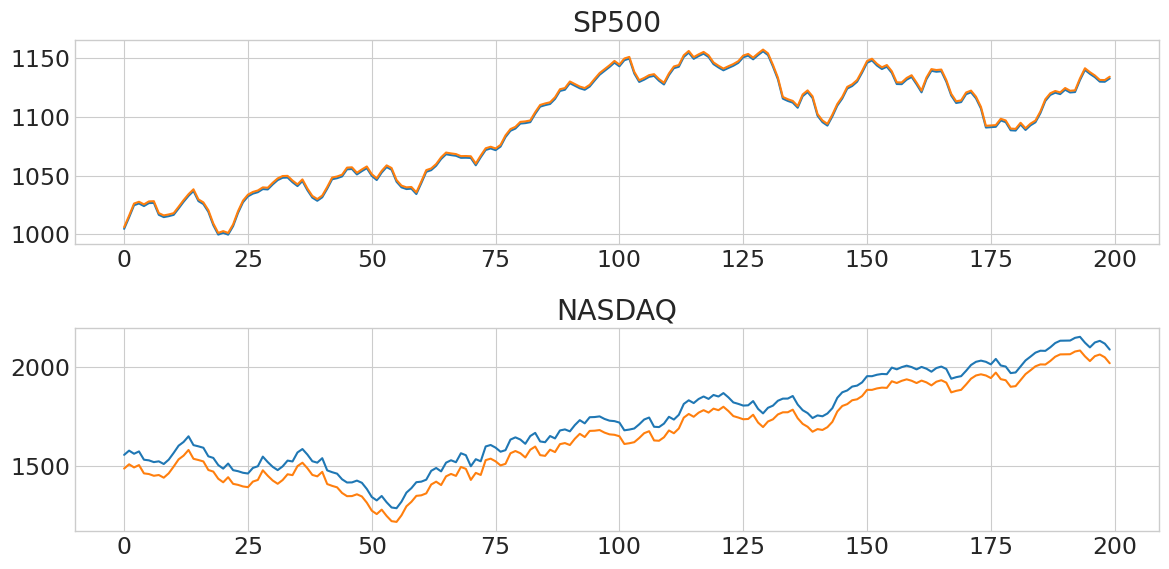

In [15]:
_, ax = plt.subplots(nrows=2, ncols=1, figsize=[12, 6])

for count, (dataset_name, dataset) in enumerate(datasets.items()):
    ax[count].plot(dataset[train_split:train_split+200])
    model = models[dataset_name]
    forecasts = model.predict(dataset[train_split:train_split+200], steps_ahead=1)
    ax[count].plot(forecasts)
    ax[count].set_title(dataset_name)
    
plt.tight_layout()

In [16]:
from pyFTS.benchmarks import Measures

rows = []

for count, (dataset_name, dataset) in enumerate(datasets.items()):
    row = [dataset_name]
    test = dataset[train_split:train_split+200]
    model = models[dataset_name]
    row.extend(Measures.get_point_statistics(test, model))
    rows.append(row)
    
pd.DataFrame(rows,columns=["Dataset", "RMSE", "MAPE", "Theil's U"]).set_index("Dataset")

,RMSE,MAPE,Theil's U
Dataset,,,
SP500,5.58,0.40,1.01
NASDAQ,75.01,4.17,3.13


## Residual Analysis

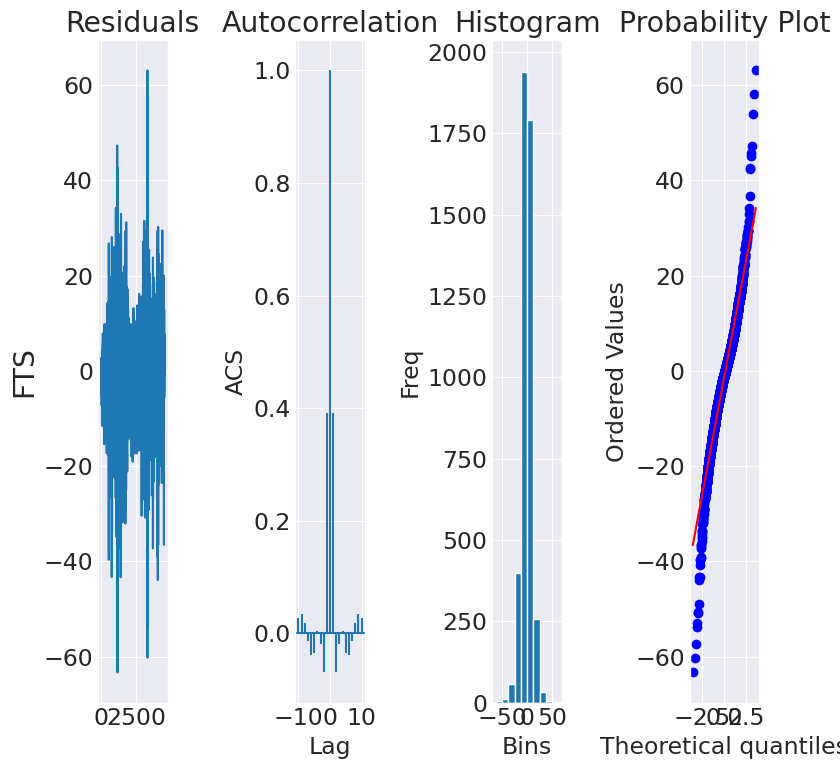

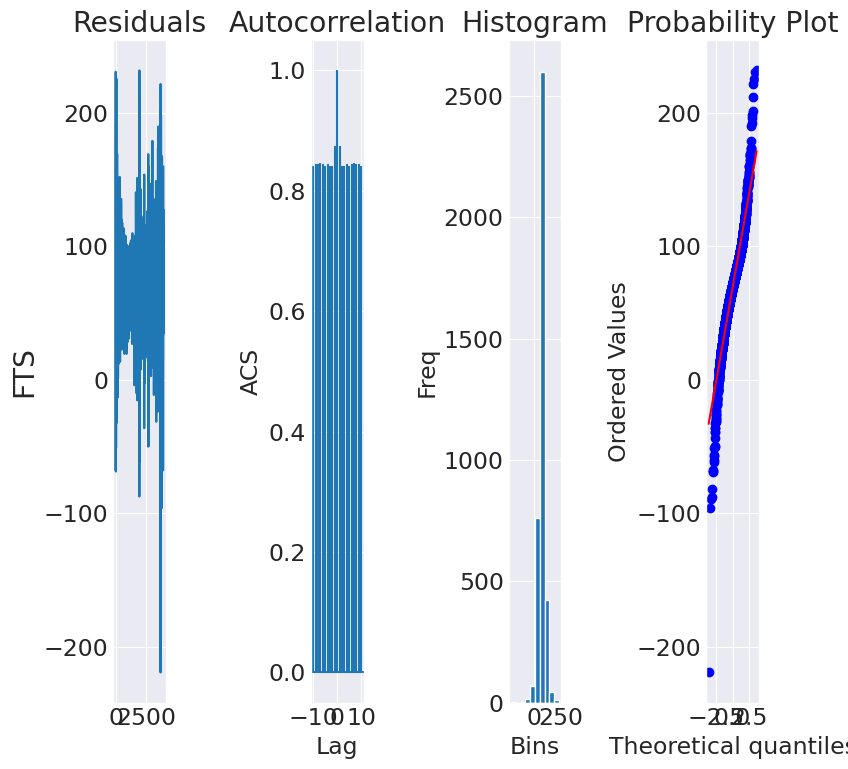

In [17]:
from pyFTS.benchmarks import ResidualAnalysis as ra

for count, (dataset_name, dataset) in enumerate(datasets.items()):
    model = models[dataset_name]
    ra.plot_residuals_by_model(dataset, [model])